# Interpolación

| $\textbf{x}$ | $\textbf{y}$ |
| -- | -- |
|$x_0$ | $y_0$ |
|$x_1$ | $y_1$ |
| $x_2$ | $y_2$ | 
    |$\vdots$|$\vdots$
| $x_N$ |$y_N$ | 


 $$p_N(x)=a_0+a_1x+a_2x^2 \cdots+a_Nx^N$$
 
 con la propiedad:     $p_{N}(x_i)=y_i$

#### Método de Horner 
&nbsp;

$$ a)\quad
\begin{align}
&a_2x^2+a_1x+a_0\\
&[a_2x+a_1]x+a_0
\end{align}
$$
&nbsp;

$$ b)\quad
\begin{align}
&a^3x^3+a_2x^2+a_1x+a_0\\
&\left[[a_3x+a_2]x+a_1\right]x+a_0
\end{align}
$$

&nbsp;

$$ b)\quad
\begin{align}
&a_4x^4+a^3x^3+a_2x^2+a_1x+a_0\\
&[[[a_4x+a_3]x+a_2]x+a_1]x+a_0
\end{align}
$$

In [ ]:
#Función que evalua un polinomio usando el método de Horner
# los coeficientes se ingresan de grado menor a grado mayor
def horner(a,x) :
    n=len(a)
    p=a[-1]
    for k in range(2,n+1):
        p=p*x+a[-k]
    return p


#### **Ejemplo Horner** Sea $-x^2+2x+4$ evaluarlo en $x=3$

In [ ]:
 p=horner([4,2,-1],3)
p


1

#### ENFOQUE DIRECTO 
El polinomio buscado debe de cumplir 
&nbsp;

$$
\begin{align}
y_1&=p(x_1)=a_0+a_1x_1+a_2x_1^2+a_3x_1^3+\cdots +a_nx_1^n \\
y_2&=p(x_2)=a_0+a_1x_2+a_2x_2^2+a_3x_2^3+\cdots +a_nx_2^n \\
y_3&=p(x_3)=a_0+a_1x_3+a_2x_3^2+a_3x_3^3+\cdots +a_nx_3^n \\
       \vdots& \quad  \quad  \quad \vdots \quad  \quad  \quad \vdots \quad  \quad  \quad \vdots\\
y_{n+1}&=p(x_{n+1})=a_0+a_1x_{n+1}+a_2x_{n+1}^2+a_3x_{n+1}^3+\cdots +a_{n+1}x_{n+1}^M 
\end{align}
$$

A la matriz de este sistema se le llama Matriz de Vandermode
$$
\begin{pmatrix}
1&x_1&x_1^2\cdots &x_1^n \\
1&x_2&x_2^2\cdots &x_2^n \\
\vdots& \vdots&\vdots& \vdots\\
1&x_{n+1}&x_{n+1}^2\cdots &x_{n+1}^n
\end{pmatrix}
$$

-Ejemplo- sea $y(x) = (x + 0.9)(x + 0.1)2 (x − 0.2)(x − 0.8)$, generemos doce puntos de este polinomio en $-1 \leq z\leq1$


,0,1,2,3,4,5,6,7,8,9,10,11
x,-1.0000,-0.818182,-0.636364,-0.454545,-0.272727,-0.090909,0.090909,0.272727,0.454545,0.636364,0.818182,1.0000
y,0.3888,-0.193627,-0.339746,-0.259377,-0.109887,0.003813,0.029267,-0.033524,-0.132104,-0.161564,0.035463,0.6688


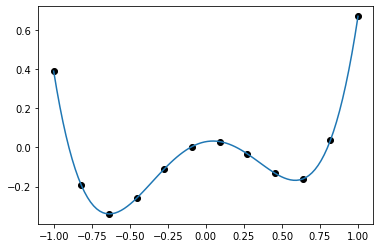

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x1=np.linspace(-1,1,100)
y1=(x1+0.9)*(x1+0.1)*2*(x1-0.2)*(x1-0.8)
x=np.linspace(-1,1,12)
y=(x+0.9)*(x+0.1)*2*(x-0.2)*(x-0.8)
data=[x,y]
columns=["x","y"]
Tp=pd.DataFrame(data,columns)

plt.plot(x,y,'ko')
plt.plot(x1,y1)
Tp

In [ ]:
def vanDer(x):
    n=len(x)
    Vd=np.zeros((n,n))
    for i in range (0,n):
        Vd[:,i]=x**i
    return(Vd)


In [ ]:
from scipy import linalg as la

x=np.linspace(-1,1,5)
y=(x+0.9)*(x+0.1)*2*(x-0.2)*(x-0.8)
Vd=vanDer(x)
sol=la.solve(Vd,y)
sol

array([ 0.0288,  0.14  , -1.5   , -0.    ,  2.    ])

### Enfoque de Lagrange 
&nbsp;

$$
p_n(x)=\sum_{i=1}^{n+1}y_il_i(x),
$$
&nbsp;
Donde 
&nbsp;

$$
\begin{align}
l_i&=\frac{(x-x_1)(x-x_2)\cdots (x-x_{i-1})(x-x_{i+1})\cdots (x-x_{n+1})}{(x_i-x_1)(x_i-x_2)\cdots (x_i-x_{i-1})(x_i-x_{i+1})\cdots (x_i-x_{n+1})}\\
 &=\prod_{\substack{j=1\\i\neq j}}^{n+1}\frac{x-x_j}{x_i-x_j}
 \end{align}
$$
&nbsp;

para el caso 2 tenemos $p(x)=y_0l_0+y_1l_1+y_2l_2$

. $$l_0=\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}$$

. $$l_1=\frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}$$

. $$l_2=\frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}$$


**Ejemplo 2**

| $\textbf{x}$ | $\textbf{y}$ |
| -- | -- |
|$0$ | $1$ |
|$1/2$ | $-1$ |
| $1$ | $2$ | 

$$p(x)=y_0l_0+y_1l_1+y_2l_2$$
Donde :

. $$l_0=\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}$$

. $$l_1=\frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}$$

. $$l_2=\frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}$$
. 



In [ ]:
def pol2(x):
    
    l0=((x-.5)*(x-1))/.5
    l1=((x)*(x-1))/(.5*(-.5))
    l2=(x*(x-.5))/.5
    p=l0+(-1)*l1+2*l2
    return(p)
    


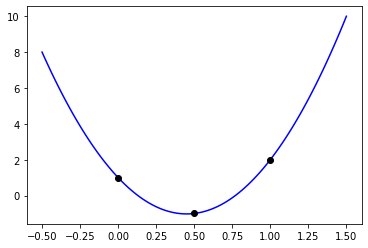

In [ ]:
import numpy as np
x1=np.array([0,.5,1])
y1=np.array([1,-1,2])

xw=np.linspace(-.5,1.5,100)
yw=pol2(xw)
plt.plot(xw,yw,"b",)
plt.plot(x1,y1,"ko")
plt.show()

In [ ]:

def pole(w):
    x=np.linspace(-np.pi/2,np.pi/2,4)
    y=np.sin(w)
    
    l0=((w-x[1])*(w-x[2])*(w-x[3]))/((x[0]-x[1])*(x[0]-x[2])*(x[0]-x[3]))
    l1=((w-x[0])*(w-x[2])*(w-x[3]))/((x[1]-x[0])*(x[1]-x[2])*(x[1]-x[3]))
    l2=((w-x[0])*(w-x[1])*(w-x[3]))/((x[2]-x[0])*(x[2]-x[1])*(x[2]-x[3]))
    l3=((w-x[0])*(w-x[1])*(w-x[2]))/((x[3]-x[0])*(x[3]-x[1])*(x[3]-x[2]))
    
    return(wy[0]*l0+wy[1]*l1+wy[2]*l2+wy[3]*l3)
    

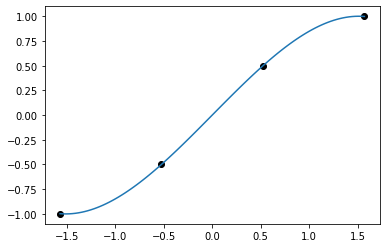

In [ ]:
w=np.linspace(-np.pi/2,np.pi/2,4)
wy=np.sin(w)
x2=np.linspace(-np.pi/2,np.pi/2,100)
polilex=pole(x2)

plt.plot(w,wy,"ko")
plt.plot(x2,polilex)
plt.show()
#plt.plot(x2,np.sin(x2))

**Teorema de Rolle**

Entre dos ceros de una función diferenciable $f$ existe un cero de $f^{'}$

**Teorema** (error en el  polinomio de interpolación de Lagrange)
 
  suponga que la función $f$ es -N+1- veces continuamente  diferenciable en $[a,b]$ que contiene los nodos $x_0,x_1,\cdots,x_n$. Sea $p$ el polinoimio de  interpolación de Lagrange. Entonces dado cualquier $x\in[a,b]$, las ($y_i=f(x_i))$
  
  $$f(x)-p(x)=\frac{(x-x_0)(x-x_1)\dots (x-x_N)}{(N+1)!}f^{(N+1)}(\xi)$$
  
  
 para alguna $\xi \in [a,b]$



Notación:

. Considere la función 
&nbsp;

$$
L(x)=\prod_{k=0}^N (x-x_k)=(x-x_0)(x-x_1)\cdots (x-x_N)
$$
&nbsp; 
Para $x\in [a,b]$  pero $x\neq x_j$, para $j=0,1,2,\cdots N$

. La función $$E(t)=f(t)-p(t)-cL(t)$$ se toma con la condición $E(x)=0$

. Se sigue que la función $E(t)$ tiene $N+2$ ceros en $[a,b]$ , $x_0,x_1,\cdots,x_N, x$

. Por el **Teo de Rolle** entre cada dos ceros de $E(t)$ existe un cero de $E^{'}(t)$

. Repitiendo este argumento para $ E^{''},E^{''} \dots , E^{N+1}$ podemos concluir que existe $\xi \in [a,b]$ tal que :
  
  $$E^{(n+1)}(\xi)=0$$


. Entonces $$f^{N+1}(\xi)-p^{N+1}(\xi)-cL^{N+1}(\xi)=0$$ y 

  * $p^{N+1}\equiv 0$ por ser un polinomio de grado a lo mas $n$
    
  * $L^{N+1}\equiv (N+1)!$
  
  * $c=\frac{f^{N+1}(\xi)}{(N+1)!}$
  
  * $$f(x)-p(x)=\frac{f^{N+1}(\xi)}{(N+1)!}L(x)=\frac{f^{N+1}(\xi)}{(N+1)!}(x-x_0)(x-x_1)\cdots (x-x_{N})$$

**Método de Newton o de las diferencias divididas**

![image.png](attachment:image.png)


*Recuerde*
$$f^{'}(x_n)\approx \frac{f(x_n)-f(x_{n-1})}{x_n-x_{n-1}}$$


 por lo tanto $$f^{'}(x_n)\approx f[x_{n-1},x_n]$$
 
y por el teorema del valor medio 

$$ f[x_{n-1},x_n]=\frac{f(x_n)-f(x_{n-1})}{x_n-x_{n-1}}=f^{'}(\xi)$$


para algún $\xi \in [x_{n-1},x_n]$

![image.png](attachment:image.png)

*De la definición de diferencia dividida*

$$f(x)=f[x_0]+(x-x_0)f[x_0,x]$$


usando la definición de diferencia dividida obtenemos 





$$
\begin{align}
p(x)&=f[x_0]+(x-x_0)f[x_0,x_1]+(x-x_0)(x-x_1)f[x_0,x_1,x_2]\\
&+\cdots +(x-x_0)\cdots(x-x_{N-1})f[x_0,x_1,\cdots,x_N]\\
\end{align}
$$

&nbsp;

$$
\begin{align}
p(x_k)&=f[x_0]+(x_k-x_0)f[x_0,x_1]+(x_k-x_0)(x_k-x_1)f[x_0,x_1,x_2]\\
&+\cdots +(x_k-x_0)\cdots(x_k-x_{k-1})f[x_0,x_1,\cdots,x_k]\\
\end{align}
$$

**Teorema** 

*El polinomio dado en la celda anterior satisface las condiciónes:*

$$p(x_k)=f(x_k)\quad (k=0,1,\cdots,N)$$

**Dem** (inducción) con $k=0$ tenemos: 

. primer paso de la inducción

$$p(x_0)=f[x_0]=f(x_0)$$

. Suponga que se cumple para $k=0,1\cdots,m$ para algún $m<N$

. Usando $N=m$ y $x_{m+1}$ obtenemos 


pero esto es $p(x_{m+1})$

. Esto completa el proceso de  inducción 

**Es fácil probar la unicidad del polinomio de Interpolación**

. La forma del polinomio de interpolación  obtenida por *Diferencias divididas* es una forma particular que permite los datos sean introducidos uno por uno sin en el esfuerzo que implica el método de *Lagrange*

. Otra implicación es que la diferencia dividida $f[x_0,x_1,\cdots x_k]$ es el coeficiente de grado $k$

. La unicidad del polinomio de interpolación nos proporciona una relación entre diferencias divididas y y las derivadas.

   .$$f(x)-p(x)=(x-x_0),(x-x_1) \cdots (x-x_N)f[x_0,x_1\cdots ,x_N,x]$$
   
   
   .$$f(x)-p(x)=\frac{(x-x_0),(x-x_1) \cdots (x-x_N)}{(N+1)!}f^{(N+1)}(\xi)$$
   
   . $$f[x_0,x_1\cdots ,x_N,x]=\frac{f^{(N+1)}(\xi)}{(N+1)!}$$

In [ ]:
# %load newtonpoly.py
## module newtonPoly
''' p = evalPoly(a,xData,x).
    Evaluates Newton's polynomial p at x. The coefficient
    vector 'a' can be computed by the function 'coeffts'.

    a = coeffts(xData,yData).
    Computes the coefficients of Newton's polynomial.
'''    
def evalPoly(a,xData,x):
    n = len(xData) - 1  # Degree of polynomial
    p = a[n]
    for k in range(1,n+1):
        p = a[n-k] + (x -xData[n-k])*p
    return p

def coeffts(xData,yData):
    m = len(xData)  # Number of data points
    a = yData.copy()
    for k in range(1,m):
        a[k:m] = (a[k:m] - a[k-1])/(xData[k:m] - xData[k-1])
    return a


In [ ]:
# %load pgr_polinwet.py
"""
Created on Tue Jul 14 22:11:13 2020

@author: Francisco Salem
"""


import numpy as np
def ddiff1(xdat,ydat,x) :
    N=x.size
    M=xdat.size 
    D=np.zeros((M,M))
    y=np.zeros(N)
    for k in range(N):
        xtst = x[k]
        ind=np.argsort(np.abs(xtst-xdat))
        xsort=xdat[ind]
        D[:,0]=ydat[ind]
       
    # Begin divided d i f f e r e n c e s
        for j in range(M):
            for i in range(M-j-1):
                D[i,j+1]=(D[i+1,j]-D[i,j])/(xsort[i+j+1]-xsort[i])
            #Termina las diferencias divididas
            #Empiezo la evaluación
        xdiff=xtst-xsort
        prod = 1  
        for i in range (M) :
            y[k]=y[k]+prod*D[0,i]
            prod=prod*xdiff[i]

    return y 

In [ ]:
X=np.array([0.2,0.6,1.2,1.5])
Y=np.sqrt(X)
x=np.array([0.3,1.1])
y=ddiff1(X,Y,x)
print("\nlos valores son", y)


los valores son [0.54106893 1.05032546]


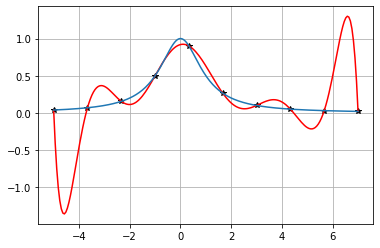

In [ ]:
import matplotlib.pyplot as plt
def runge(w):
    return(1/(1+w**2))

X=np.linspace(-5,7,10)
Y=runge(X)
x=np.linspace(-5,7,200)
y=ddiff1(X,Y,x)
plt.plot(X,Y,"k*",x,y,"r")
plt.plot(x,runge(x))
plt.grid()
plt.show()
